# Face detection on masked images

Notebook to test the MTCNN face detector on images of people wearing masks.

In [166]:
from pathlib import Path
from mtcnn.mtcnn import MTCNN

import numpy as np
import matplotlib.pyplot as plt
import urllib.request

### Setup 

In [170]:
# file with URLs to images
people_with_masks_fn = 'people_with_masks' 

# path were files will be downloaded
masked_face_dir = Path('masked_face_images')
masked_face_dir.mkdir(exist_ok=True)

### Download images from URL file

In [171]:
with open(people_with_masks_fn) as fp:
    for idx, line in enumerate(fp):
        try:
            urllib.request.urlretrieve(line, str(masked_face_dir / (str(idx) + '.jpg')))
        except:
            print(f"skipping {line}")

skipping https://cdn.pixabay.com/photo/2020/03/03/12/15/virus-4898571__340.jpg

skipping https://cdn.pixabay.com/photo/2020/03/26/22/04/virus-4971922__340.jpg

skipping https://cdn.pixabay.com/photo/2020/04/06/07/50/face-mask-5008608__340.jpg

skipping https://cdn.pixabay.com/photo/2020/04/04/11/28/respiratory-mask-5001897__340.jpg

skipping https://cdn.pixabay.com/photo/2020/04/04/13/38/corona-5002332__340.jpg

skipping https://cdn.pixabay.com/photo/2020/04/22/11/34/covid-19-5077645__340.jpg



### Detect faces

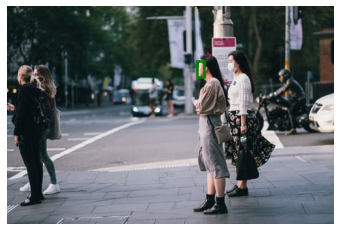

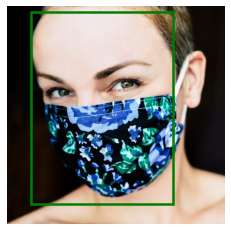

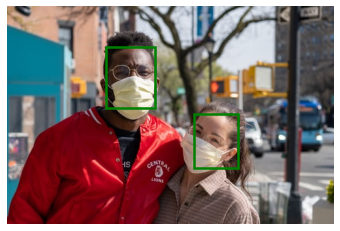

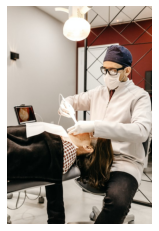

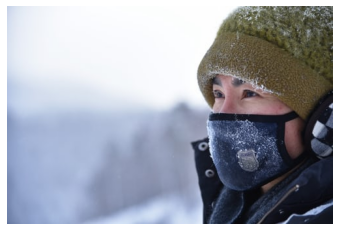

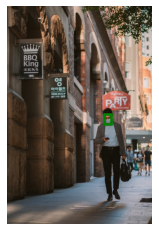

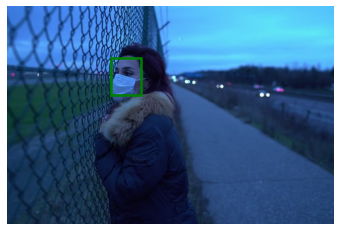

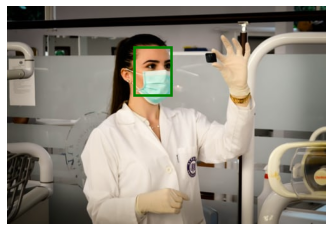

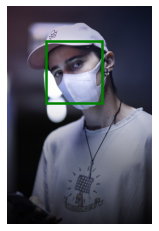

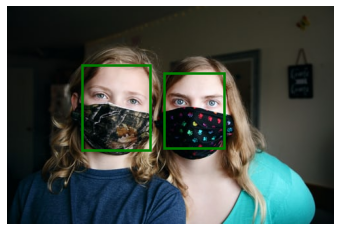

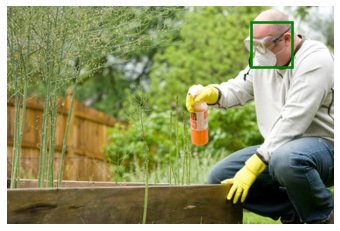

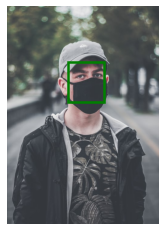

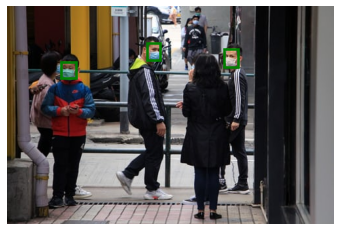

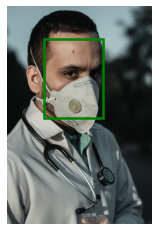

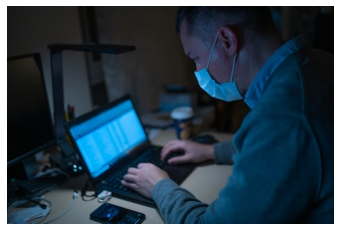

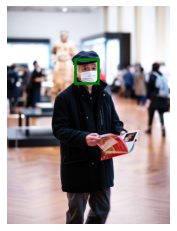

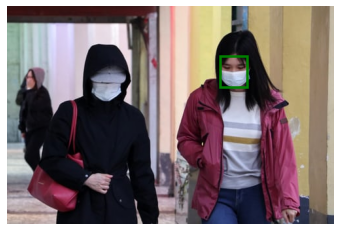

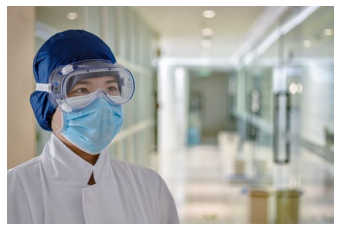

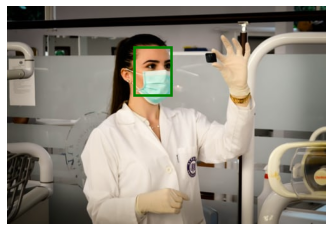

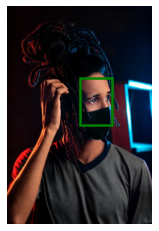

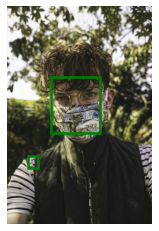

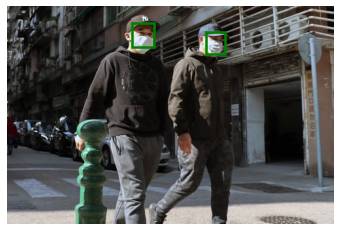

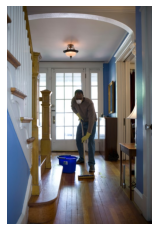

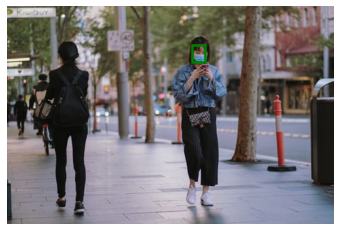

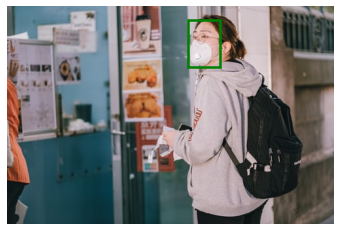

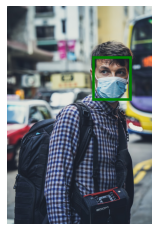

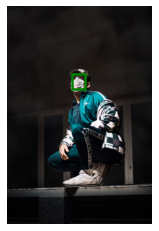

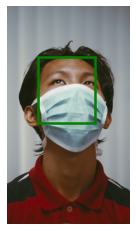

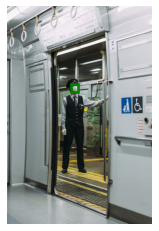

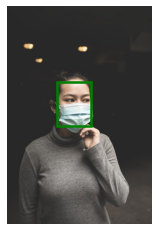

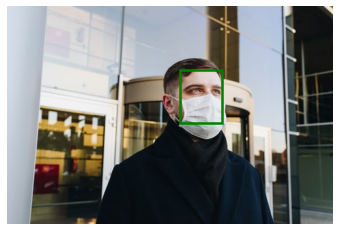

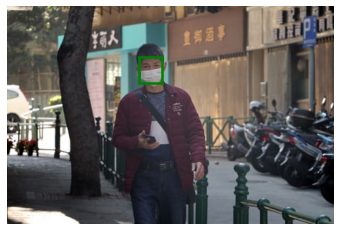

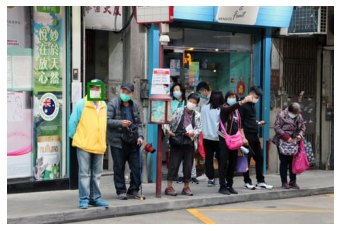

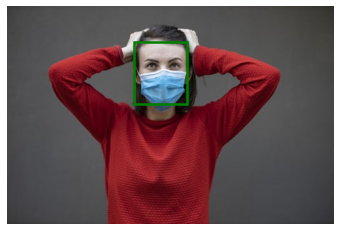

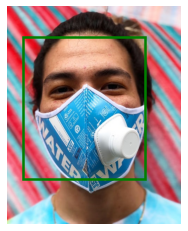

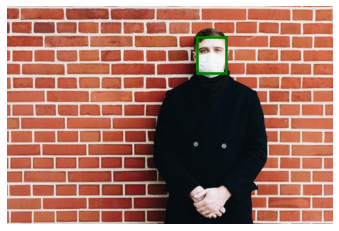

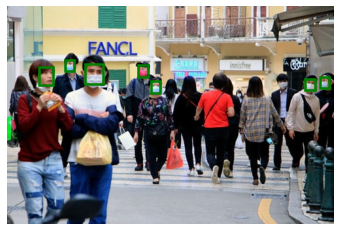

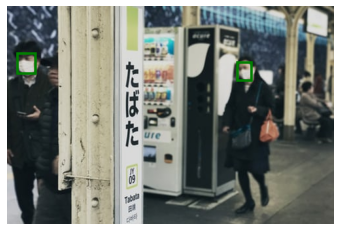

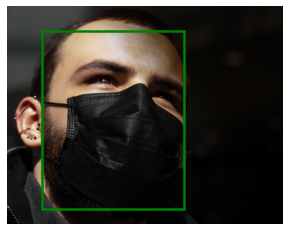

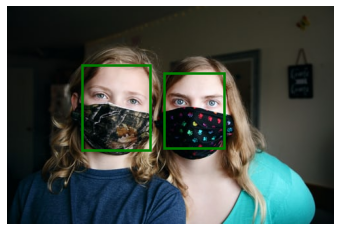

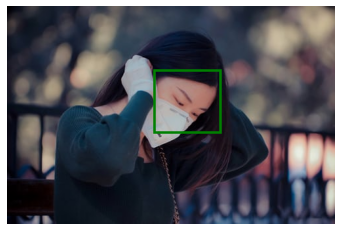

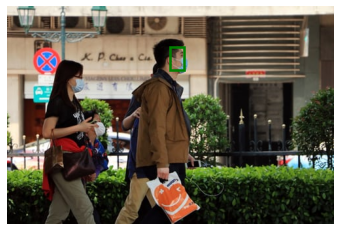

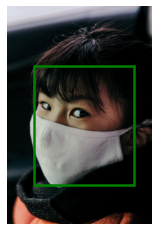

In [172]:
detector = MTCNN()

for fn in masked_face_dir.glob('*.jpg'):
    img = cv2.imread(str(fn))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure()
    plt.imshow(img)

    faces = detector.detect_faces(img)
    for face in faces:
        x = face['box'][0]
        y = face['box'][1]
        w = face['box'][2]
        h = face['box'][3]
        rect = plt.Rectangle((x, y),
                                  w,
                                  h, fill=False,
                                  edgecolor='green', linewidth=2.5)
        plt.gca().add_patch(rect)

    plt.axis('off')
    plt.show()  